In [11]:
import pandas as pd
import os
import git
import pyarrow.parquet as pq


def get_git_root():
    try:
        # Create a GitPython Repo object
        repo = git.Repo(search_parent_directories=True)

        # Get the absolute path of the root folder
        git_root = repo.git.rev_parse("--show-toplevel")

        return git_root
    except git.InvalidGitRepositoryError:
        # Handle the case where the current directory is not a Git repository
        print("Not a Git repository or an error occurred.")
        return None

# Get the root folder of the Git repository
root_folder = get_git_root()
# load CSV file from dataset dir

dataset_transform_dir=os.path.join(root_folder,"data/transform")
dataset_transform_file="fact_table.parquet"
dataset_trannsform_file_path=os.path.join(dataset_transform_dir,dataset_transform_file)
payment_transform_file="payment_type_dem.csv"
payment_trannsform_file_path=os.path.join(dataset_transform_dir,payment_transform_file)


trips = pq.read_table(dataset_trannsform_file_path)
payment=pd.read_csv(payment_trannsform_file_path)
df= trips.to_pandas()
#df.head()
#merging trip and payment_type table with left join
df=df.merge(payment,on="payment_type_id",how='left')
df.head()



,vendor_id,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pick_up_location_id,drop_off_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,time_id,payment_type_name
0,2,1,0.97,1,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,1,Cash
1,2,1,1.10,1,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,2,Credit card
2,2,1,2.51,1,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,3,Credit card
3,1,0,1.90,1,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,4,Credit card
4,2,1,1.43,1,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,5,Credit card


                   total_amount
payment_type_name              
Cash                11747211.75
Credit card         65872820.82
Dispute                82351.84
No charge             181437.39


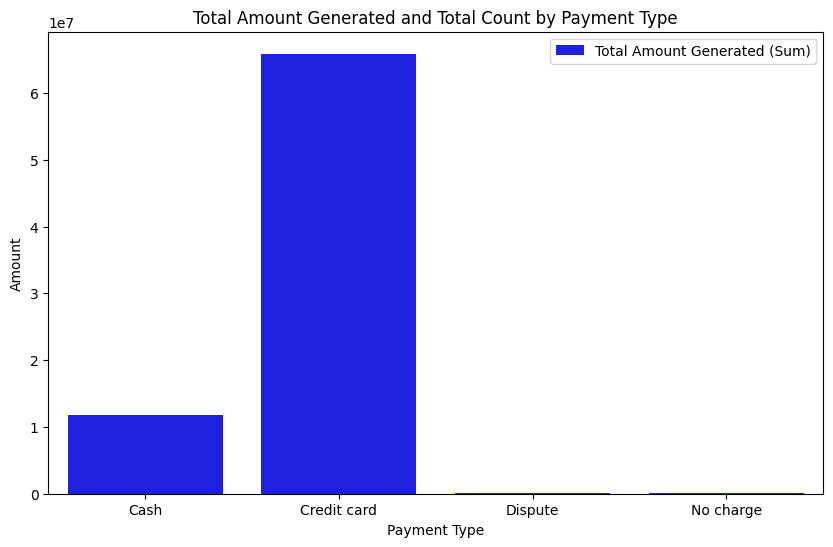

                   total_amount
payment_type_name              
Cash                     531804
Credit card             2370106
Dispute                   60750
No charge                 26091


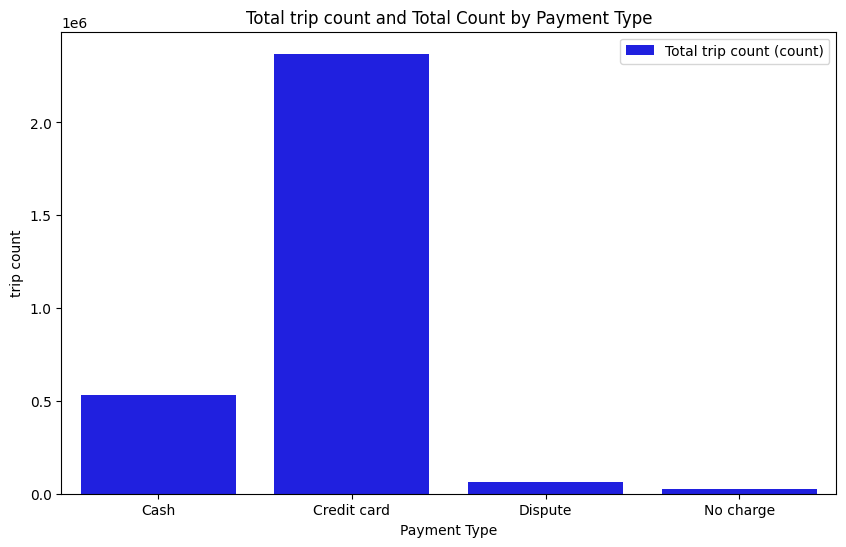

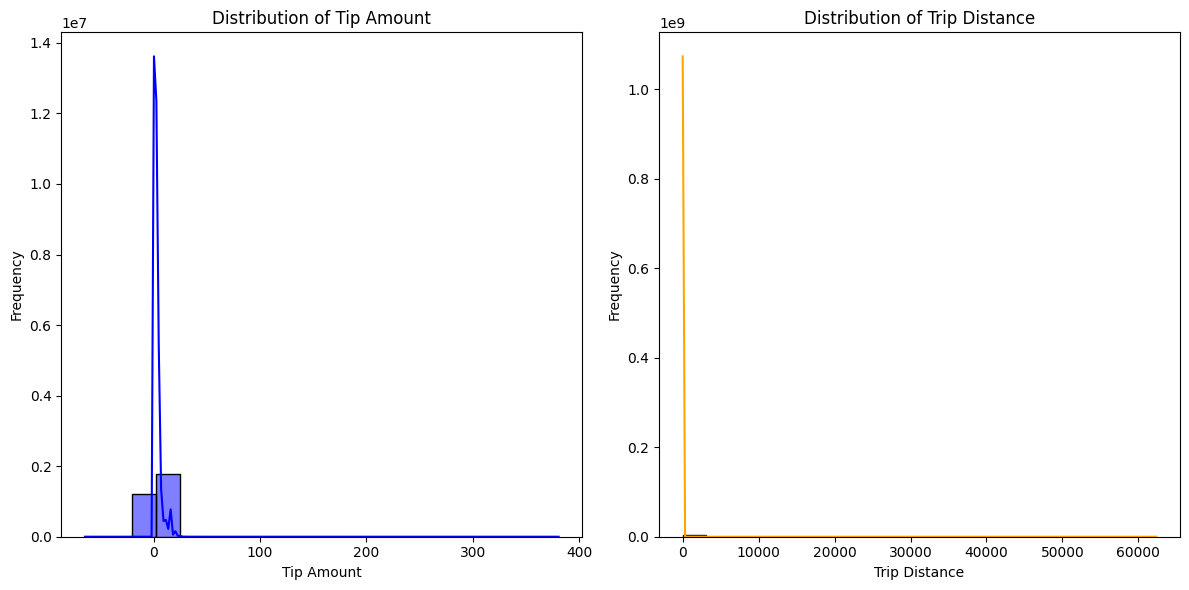

In [24]:
#Data Analysis (EDA) & Data visualization
'''
1 Analyze the distribution of amount on the basis of payment type using a bar plot.
2 Analyze the distribution of payment_type and trip count using a histogram.
3 Analyze the distribution of tip amount and trip distance

'''

import seaborn as sns
import matplotlib.pyplot as plt

figures_dir=os.path.join(root_folder,"reports/figures")

#1
# Analyzing distribution of total amount by payment_type
grouped_data=df.groupby("payment_type_name").agg({"total_amount":'sum'})
print(grouped_data)
# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type_name', y='total_amount', data=grouped_data, color='blue', label='Total Amount Generated (Sum)')

# Adding labels and title
plt.xlabel('Payment Type')
plt.ylabel('Amount')
plt.title('Total Amount Generated and Total Count by Payment Type')
plt.legend()
plt.savefig(os.path.join(figures_dir, 'amount_vs_payment.png'))
# Display the plot
plt.show()

#2
# Analyze the distribution of payment_type and trip count using a histogram.
grouped_data=df.groupby("payment_type_name").agg({"total_amount":'count'})
print(grouped_data)
# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type_name', y='total_amount', data=grouped_data, color='blue', label='Total trip count (count)')

# Adding labels and title
plt.xlabel('Payment Type')
plt.ylabel('trip count')
plt.title('Total trip count and Total Count by Payment Type')
plt.legend()
plt.savefig(os.path.join(figures_dir, 'trip_vs_payment.png'))
# Display the plot
plt.show()

#3 
#Analyze the distribution of tip amount and trip distance

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['tip_amount'], bins=20, kde=True, color='blue')
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['trip_distance'], bins=20, kde=True, color='orange')
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'trip_distance_vs_tip_ammount.png'))
plt.show()
